# Capstone Project : Where to live in Denver, CO, USA <br>
## The Problem : <br>
### How to help a client select a neighborhood to live in? <br>


## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we are imagining that the client needs assistance locating a neighborhood in a city (Denver) that fulfills their individual needs.  <br>
In Denver, as in many cities, different neighborhoods have different qualities, and finding the place to live that fulfills a clients individual desires can be difficult. In this project the client will be able to select a neighborhood name, view a dataframe of that neighborhoods ten most common venues and view the location of that neighborhood on a city map.

## The Data <a name = "data"></a>


The data is primarily FourSquare Venue data, using created centroids of Neighborhoods from the Denver Open Catalog Statistical Neighborhoods KML. <br>
The location of the neighborhood data can be found here https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-statistical-neighborhoods<br>
I convert the file into a geojson using : https://mygeodata.cloud/converter/kml-to-geojson and layer it on top of an ipyleaflet map

### Import Libraries

In [1]:

#set jupiter to widescreen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))






from bs4 import BeautifulSoup
from sklearn.cluster import KMeans

from matplotlib.pyplot import figure
import geocoder # import geocoder
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from IPython.display import *


import folium # map rendering library

from fastkml import kml
import ipyleaflet
from ipyleaflet import *

from shapely.geometry import Point, LineString



### Initialize Foursquare Credentials

In [2]:
#Initialize Foursquare credentials
CLIENT_ID = 'X4SJA3AV3FTZ22OEQXP55EHFQLTOUCZKGTSCC5F2JOQO501J' # your Foursquare ID
CLIENT_SECRET = 'C2FQD1BVTVLMHFULLVVRA3X3AD0S4GHUJQKFYXO3MH1ARGTJ' # your Foursquare Secret
ACCESS_TOKEN = '45U4RLZCPAHXURFJBXLSCVEMY1R3IBZYIJT1ELCAM1D5PPJV' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100 # A default Foursquare API limit value

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

### Set Pandas Options and set Jupyter to widescreen

In [3]:
import pandas as pd
pd.set_option('display.max_rows', 100)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Import Neigborhood Lat/Lon

We will use requests to get the shapefile from the Denver Open Data Catalog, open it as a variable denver_geojson and place the Neighborhood names and Polygon coordinates into a variable gdf. Then create centroids of neighborhoods using the geopandas.GeoSeries.centroid function. It give a warning that the coordinates may be off, which 

In [4]:
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point
import matplotlib.pyplot as plt
import requests
import pyproj 

file = requests.get("https://www.denvergov.org/media/gis/DataCatalog/statistical_neighborhoods/shape/statistical_neighborhoods.zip")

with open('.\Resources\statistical_neighborhoods.geojson', 'r') as f:
    denver_geojson = f.read()
    
gdf = gpd.read_file(denver_geojson)[['NBHD_NAME', 'geometry']]

#rename column NBHD to Neighborhood
gdf.columns = ['Neighborhood', 'geometry']
#attempt to project to CRS, not sure why it still gives warning after this is done.
gdf = gdf.to_crs("EPSG:4326")
#create centroid lat/lon for FourSquare search

centroids = gpd.GeoDataFrame()
centroids['Neighborhood'] = gdf['Neighborhood']
centroids["Latitude"] = gdf.centroid.map(lambda p: p.y)
centroids["Longitude"] = gdf.centroid.map(lambda p: p.x)

centroids
    





<ipython-input-4-c05b3a8ab078>:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids["Latitude"] = gdf.centroid.map(lambda p: p.y)
<ipython-input-4-c05b3a8ab078>:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids["Longitude"] = gdf.centroid.map(lambda p: p.x)


,Neighborhood,Latitude,Longitude
0,Auraria,39.745821,-105.008267
1,Cory - Merrill,39.690462,-104.949822
2,Belcaro,39.705044,-104.950477
3,Washington Park,39.701238,-104.966267
4,Washington Park West,39.702575,-104.979904
5,Speer,39.719245,-104.980294
6,Cherry Creek,39.719400,-104.949281
7,Country Club,39.722304,-104.966005
8,Congress Park,39.732851,-104.950307
9,City Park,39.745623,-104.950170


Function to pull venue data from Foursquare using neighborhood lat/lng

In [5]:
#Function to pull venue information about each postal code
def getNearbyVenues(names, latitudes, longitudes, radius=750):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
#make a 1d list of each item and append to columns
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

To save time and space we will first check if this data exists and if not, use the getNearbyVenues function to create it

In [6]:
import os
from os import path

if os.path.isfile('./Resources/denver_venues.csv'):
    
    denver_venues = pd.read_csv('./Resources/denver_venues.csv', index_col =[0])
   
    
    print("denver_venues.csv exists and read")
else:
    denver_venues = getNearbyVenues(names = centroids['Neighborhood'],
                                 latitudes = centroids['Latitude'],
                                 longitudes = centroids['Longitude'])
        
    denver_venues.to_csv( './Resources/denver_venues.csv')


denver_venues.head()

denver_venues.csv exists and read


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Auraria,39.745821,-105.008267,Tivoli Brewing Company,39.745494,-105.005475,Brewery
1,Auraria,39.745821,-105.008267,Ball Arena,39.748700,-105.007600,Basketball Stadium
2,Auraria,39.745821,-105.008267,SpringHill Suites Denver Downtown,39.747537,-105.003805,Hotel
3,Auraria,39.745821,-105.008267,Alfresco Greens,39.744905,-105.005778,Salad Place
4,Auraria,39.745821,-105.008267,Orangetheory Fitness,39.750981,-105.003716,Gym


# Exploring the Venue Data

Here we will begin to look at the venue data and consider how to organize it to better filter it based on the clients desire to live near specific types of venues.

In [7]:
#How many venues in each neighborhood
denver_venues.groupby('Neighborhood')


In [8]:
print('There are {} unique categories.'.format(len(denver_venues['Venue Category'].unique())))

There are 298 unique categories.


In [9]:
denver_venues['Venue Category'].unique()

array(['Brewery', 'Basketball Stadium', 'Hotel', 'Salad Place', 'Gym',
       'Theme Park Ride / Attraction', 'German Restaurant',
       'French Restaurant', 'Hot Dog Joint', 'Theme Park', 'Bar',
       'Irish Pub', 'Coffee Shop', 'American Restaurant',
       'Chinese Restaurant', 'Theater', 'Fast Food Restaurant',
       'IT Services', 'Light Rail Station', 'Café', 'Pizza Place', 'Park',
       'Discount Store', 'Tea Room', 'Asian Restaurant', 'Music Store',
       'Jewelry Store', 'Weight Loss Center', 'Clothing Store',
       'Grocery Store', 'Lawyer', 'Pharmacy', 'Italian Restaurant',
       'Ice Cream Shop', 'Liquor Store', 'Wings Joint', 'Gift Shop',
       'Breakfast Spot', 'Bakery', 'Taco Place', 'Sandwich Place', 'Spa',
       'Tree', 'Volleyball Court', 'Athletics & Sports',
       'Sporting Goods Shop', 'Restaurant',
       'Paper / Office Supplies Store', 'Plaza', 'Lake', 'Massage Studio',
       'Boutique', 'Salon / Barbershop', 'Yoga Studio', 'Bike Trail',
       'Arts 

As there are 298 unique venue categories, many of these can be merged to simplify interpretation and clarify density and desirability of a neighborhood. <br>
First we will one hot code and transpose the venues to columns for easier processing.<br>

Next we are refining the venue categories the data into categories I think are relatable as types of things to want to live near.

In [10]:

# one hot encoding
denver_onehot = pd.get_dummies(denver_venues[['Venue Category']], prefix="", prefix_sep="")
#Replace Neighborhood column
denver_onehot['Neighborhood'] = denver_venues['Neighborhood'] 
#locate neighborhood
neigh_loc = denver_onehot.columns.get_loc('Neighborhood')
#move Neighborhood to the 0 column
fixed_columns = [denver_onehot.columns[neigh_loc]] + list(denver_onehot.columns)
denver_onehot = denver_onehot[fixed_columns]
#dropping duplicate ['Neighborhood']
denver_onehot = denver_onehot.loc[:,~denver_onehot.columns.duplicated()]

denver_onehot.to_csv( './Resources/denver_onehot.csv')
denver_onehot.shape

(2310, 298)

In [13]:


# one hot encoding
denver_onehot = pd.get_dummies(denver_venues[['Venue Category']], prefix="", prefix_sep="")
#Replace Neighborhood column
denver_onehot['Neighborhood'] = denver_venues['Neighborhood'] 
#locate neighborhood
neigh_loc = denver_onehot.columns.get_loc('Neighborhood')
#move Neighborhood to the 0 column
fixed_columns = [denver_onehot.columns[neigh_loc]] + list(denver_onehot.columns)
denver_onehot = denver_onehot[fixed_columns]
#dropping duplicate ['Neighborhood']
denver_onehot = denver_onehot.loc[:,~denver_onehot.columns.duplicated()]

denver_onehot.to_csv( './Resources/denver_onehot.csv')
denver_onehot.shape


# Renaming 'Fast Food Restaurant' and adding other fast food type venues 
import numpy as np

ff = ['Fast Food Restaurant','Food','Food & Drink Shop','Food Court','Food Truck','Snack Place'] 

denver_onehot['Fast Food'] = np.add.reduce(denver_onehot[ff], axis = 1)
denver_onehot = denver_onehot.drop(ff, axis = 1)
#Concatenating all Stadiums

sport = ['Baseball Field','Baseball Stadium','Basketball Stadium','Football Stadium','Soccer Stadium','Hockey Arena']
denver_onehot['Sports Stadium'] = np.add.reduce(denver_onehot[sport], axis = 1)
denver_onehot = denver_onehot.drop(sport, axis = 1)



#Locating venues with 'Restaurant'  
column_names = denver_onehot.columns
r = []
for i in column_names:
    if 'Restaurant' in i:
        r.append(i)
        
r.extend(['BBQ Joint','Noodle House','Pizza Place','Steakhouse'])    



#Concatenating sit down Restaurants
denver_onehot['Restaurants'] = np.add.reduce(denver_onehot[r], axis =1 )
denver_onehot = denver_onehot.drop( r, axis = 1) 
 


 #Concatenating Joint or Boutique Restaurants

joints = ['Bagel Shop','Bakery','Bistro','Breakfast Spot','Burger Joint',
          'Burrito Place','Creperie','Deli / Bodega','Donut Shop',
          'Fried Chicken Joint','Gastropub','Hot Dog Joint','Sandwich Place',
          'Soup Place','Taco Place','Wings Joint','Diner','Juice Bar','Salad Place',
         'Fish & Chips Shop','Food Service','Pet Café','Poke Place','Street Food Gathering']

denver_onehot['Boutique Restaurants'] = np.add.reduce(denver_onehot[joints], axis =1 )
denver_onehot=denver_onehot.drop(labels = joints, axis = 1)

#Concatenating Bars and pubs

bars = ['Bar','Beer Bar','Beer Garden','Cocktail Bar','Dive Bar','Lounge',
        'Pub','Speakeasy','Sports Bar','Whisky Bar','Wine Bar',
        'Roof Deck','Karaoke Bar','Gay Bar','Hookah Bar','Irish Pub','Pool Hall',
       'Sake Bar','Travel Lounge']
denver_onehot['Bars and Pubs'] = np.add.reduce(denver_onehot[bars], axis =1 )
denver_onehot = denver_onehot.drop(labels = bars, axis = 1)

#Concatenating Brewery and Distillery
brews = ['Brewery','Distillery','Winery']
denver_onehot['Brewerys & Distilleries']= np.add.reduce(denver_onehot[brews], axis =1 )
denver_onehot = denver_onehot.drop(labels = ['Brewery','Distillery'], axis =1 )

#Create list of clubs

clubs = []
for i in column_names:
    if 'Club' in i:
        clubs.append(i)

clubs.append('Nightclub')
#Concatenating Clubs
denver_onehot['Clubs'] = np.add.reduce(denver_onehot[clubs], axis =1 )

denver_onehot = denver_onehot.drop(labels = clubs, axis = 1)

#Dessert Shops

dessert = ['Candy Store','Churrascaria','Cupcake Shop','Dessert Shop','Ice Cream Shop',
          'Frozen Yogurt Shop']
denver_onehot['Dessert'] = np.add.reduce(denver_onehot[dessert], axis =1 )

denver_onehot = denver_onehot.drop(labels = dessert, axis = 1)

#Coffee, Cafe, Tea
coffee_tea = ['Café','Coffee Shop','Tea Room']
denver_onehot['Coffee & Tea']= np.add.reduce(denver_onehot[coffee_tea], axis =1 )

denver_onehot = denver_onehot.drop(labels = coffee_tea, axis = 1)

#Theaters and Music Venues
#Create list of Theaters
column_names = denver_onehot.columns
t = []
for i in column_names:
    if 'Theater' in i:
        t.append(i)
t.extend(['Opera House','Music Venue'])
denver_onehot['Theaters & Music'] = np.add.reduce(denver_onehot[t], axis =1 )
denver_onehot=denver_onehot.drop(t,axis = 1)

#Fitness

f = ['Athletics & Sports','Dance Studio','Cycle Studio','Gym','Gym / Fitness Center',
     'Pool','Recreation Center','Skating Rink','Soccer Field',
     'Tennis Court','Trail','Yoga Studio','Golf Course','Bike Rental / Bike Share',
     'Basketball Court','Bike Trail', "Fishing Spot",'Gymnastics Gym','Lake','Park',
    'Skate Park','State / Provincial Park','Track','Volleyball Court']

denver_onehot['Fitness'] = np.add.reduce(denver_onehot[f], axis =1 )
denver_onehot = denver_onehot.drop(f, axis = 1)

#Self Care and Health

self = ['Health & Beauty Service','Massage Studio','Optical Shop','Spa',
        'Chiropractor','Pharmacy','Alternative Healer','Salon / Barbershop','Tanning Salon',
        'Acupuncturist',"Doctor's Office",'Veterinarian','Weight Loss Center']

denver_onehot['Selfcare & Health'] = np.add.reduce(denver_onehot[self], axis =1 )
denver_onehot = denver_onehot.drop(self, axis = 1)

#Arts and History

arts = ['Aquarium','Art Gallery','Art Museum', 'Arts & Entertainment','Botanical Garden',
        'Event Space','Exhibit','General Entertainment','Historic Site',
        'History Museum','Museum','Outdoor Sculpture','Garden','Theme Park','Zoo Exhibit','Concert Hall',
       'Performing Arts Venue','Planetarium','Science Museum','Sculpture Garden','Theme Park Ride / Attraction',
       'Zoo']

denver_onehot['Arts, History, & Entertainment']= np.add.reduce(denver_onehot[arts], axis =1 ) 
denver_onehot = denver_onehot.drop(arts, axis =1 )

#Hobbys and Games

g = ['Arcade','Bowling Alley','Escape Room','Hobby Shop',
     'Music Store','Record Shop','Sporting Goods Shop',
     'Toy / Game Store','Video Store','Arts & Crafts Store','Video Game Store']

denver_onehot['Hobbys & Games'] = np.add.reduce(denver_onehot[g], axis =1 )
denver_onehot = denver_onehot.drop(g, axis = 1)

#Shops and Boutiques

shops = ['Antique Shop','Baby Store','Bookstore','Boutique',
         'Brasserie','Bridal Shop','Clothing Store','Cosmetics Shop','Department Store',
         'Discount Store','Electronics Store','Flower Shop','Furniture / Home Store',
         'Gift Shop','Jewelry Store','Kitchen Supply Store','Lingerie Store',
         'Market',"Men's Store",'Mobile Phone Shop','Outdoor Supply Store',
         'Paper / Office Supplies Store','Pet Store','Shop & Service',
         'Shopping Mall','Smoke Shop','Souvenir Shop',"Women's Store", 'Accessories Store',
         'Board Shop','Fabric Shop','Flea Market','Gun Shop','Kids Store',
         'Miscellaneous Shop','Shopping Plaza','Ski Shop','Tailor Shop','Tattoo Parlor',
        'Thrift / Vintage Store','Used Bookstore','Warehouse Store']

denver_onehot['Shopping'] = np.add.reduce(denver_onehot[shops], axis =1 )
denver_onehot = denver_onehot.drop(shops, axis = 1)

#Groceries

groc = ['Butcher','Cheese Shop','Farm','Farmers Market','Fish Market',
        'Grocery Store','Herbs & Spices Store','Organic Grocery','Fruit & Vegetable Store',
        'Gourmet Shop']
denver_onehot['Groceries'] = np.add.reduce(denver_onehot[groc], axis = 1)
denver_onehot = denver_onehot.drop(groc, axis = 1)

#Home Improvement
home = ['Carpet Store', 'Construction & Landscaping','Garden Center','Hardware Store',
       'Home Service','Other Repair Shop']
denver_onehot['Home Improvement'] = np.add.reduce(denver_onehot[home], axis = 1)
denver_onehot = denver_onehot.drop(home, axis =1)

#Banking and Professional Services
bank = ['ATM','Bank','Check Cashing Service', 'Business Service','Financial or Legal Service',
       'IT Services','Lawyer','Office','Photography Studio','Print Shop','Recording Studio',
       'Rental Service','Shipping Store','Storage Facility']
denver_onehot['Banking & Professional Services'] = np.add.reduce(denver_onehot[bank], axis = 1)
denver_onehot = denver_onehot.drop(bank, axis = 1)

#Liquor and dispenseries Stores
liquor = ['Beer Store','Wine Shop','Liquor Store', 'Marijuana Dispensary']
denver_onehot['Liquor & Dispenseries'] = np.add.reduce(denver_onehot[liquor], axis = 1)
denver_onehot = denver_onehot.drop(liquor, axis = 1)

#Drop Infrastructre
infra = ['Airport', 'Airport Lounge','Airport Service','Airport Terminal','Bridge',
        'Government Building','Intersection','Playground','Plaza',"Residential Building (Apartment / Condo)",
        'Scenic Lookout','Tree','Airport Gate']
denver_onehot = denver_onehot.drop(infra, axis = 1)

#Public Transit
transit = ['Bus Line','Bus Station', 'Bus Stop','Light Rail Station','Metro Station','Train Station']
denver_onehot['Public Transit'] = np.add.reduce(denver_onehot[transit], axis = 1)
denver_onehot = denver_onehot.drop(transit, axis = 1)

#Vehicle Care
vehicle = ['Automotive Shop', 'Gas Station','Motorcycle Shop','Rental Car Location']
denver_onehot['Vehicle Care'] = np.add.reduce(denver_onehot[vehicle], axis = 1)
denver_onehot = denver_onehot.drop(vehicle, axis = 1)

categories = [ 'Fast Food', 'Restaurants', 'Boutique Restaurants', 'Bars and Pubs',
              'Brewerys & Distilleries','Clubs','Dessert','Coffee & Tea','Theaters & Music',
              'Fitness','Selfcare & Health','Arts, History, & Entertainment','Hobbys & Games','Shopping',
              'Groceries','Banking & Professional Services','Liquor & Dispenseries','Public Transit','Vehicle Care'] 
denver_onehot[categories]

,Fast Food,Restaurants,Boutique Restaurants,Bars and Pubs,Brewerys & Distilleries,Clubs,Dessert,Coffee & Tea,Theaters & Music,Fitness,Selfcare & Health,"Arts, History, & Entertainment",Hobbys & Games,Shopping,Groceries,Banking & Professional Services,Liquor & Dispenseries,Public Transit,Vehicle Care
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2306,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2307,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2308,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
denver_onehot.to_csv( './Resources/denver_onehot_refined.csv')
denver_onehot.shape


(2310, 30)

Now we have all pertinent venues sorted into easily relatable categories. This concludes the data gathering phase, next we will use this data to analyse the density of venues within the neighborhoods of Denver.



## Methodology <a name="methodology"></a>

In this project we are creating tools to allow the client to specify categories of venues and filtering for neighborhoods with high density of those categories. <br>
<br>
In the first step we collected the necessary  **data: location and type of every venue in 750 m of centroids developed from neighborhood boundry data.** We have also organized the 298 types of venues into 19 categories.<br>
<br>
The second step in our analysis is to find **the density of venues** across the neighborhoods and organize them into an easily read Dataframe reporting the ten densest categories in a given neighborhood.<br>
<br>
Third we will see if we can identify specific clusters of neighborhoods that have common densities of venues, by identifying an effective value for k and using a k means cluster and display the clusters on a map.<br>
The fourth and final step is to create a set of tools for filtering this data to the clients desire. This is done with **a series of checkboxes** to the client to choose categories **a dropdown of neighborhoods** filtered for the checked categories to occur in the 1st, 2nd, or 3rd most common column, **and finally to generate a map** that clearly shows the neighborhoods locations.



In [15]:

#Find mean occurence of each category ie scale
denver_grouped = denver_onehot.groupby(['Neighborhood']).mean()
denver_grouped.reset_index(inplace = True)
#create a denver_cluster before denver_grouped is altered
denver_cluster = pd.DataFrame(denver_grouped)

denver_cluster=denver_cluster.drop('Neighborhood',axis = 1)

Function that sorts the columns of the Neighborhoods in descending order 

In [16]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [17]:
#Function to create sorted data frame with top 10 most common venues
def top_ten_venues(df) : 
    num_top_venues = 10
    indicators = ['st', 'nd', 'rd']
    
    # create columns according to number of top venues
    columns = ['Neighborhood']
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))
    
    neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
    neighborhoods_venues_sorted['Neighborhood'] = df['Neighborhood'] 
    
    for ind in np.arange(denver_grouped.shape[0]):
        neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df.iloc[ind, :], num_top_venues)
    #important to have a return in a function, this is the output that can be attached to a variable
    return neighborhoods_venues_sorted
top_ten_venues(denver_grouped)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Athmar Park,Shopping,Liquor & Dispenseries,Restaurants,Public Transit,Home Improvement,Fitness,Bed & Breakfast,Dessert,Banking & Professional Services,Groceries
1,Auraria,"Arts, History, & Entertainment",Restaurants,Theaters & Music,Coffee & Tea,Fitness,Public Transit,Bars and Pubs,Boutique Restaurants,Brewerys & Distilleries,Sports Stadium
2,Baker,Restaurants,Bars and Pubs,Liquor & Dispenseries,Shopping,Banking & Professional Services,Coffee & Tea,Home Improvement,Brewerys & Distilleries,Fitness,Boutique Restaurants
3,Barnum,Restaurants,Liquor & Dispenseries,Fast Food,Boutique Restaurants,Public Transit,Banking & Professional Services,Dessert,Convenience Store,Shopping,Bars and Pubs
4,Barnum West,Restaurants,Shopping,Convenience Store,Bed & Breakfast,Coffee & Tea,Public Transit,Liquor & Dispenseries,Banking & Professional Services,Home Improvement,Groceries
5,Bear Valley,Fitness,Bed & Breakfast,Dessert,Public Transit,Liquor & Dispenseries,Banking & Professional Services,Home Improvement,Groceries,Shopping,Hobbys & Games
6,Belcaro,Fast Food,Fitness,Bed & Breakfast,Dessert,Public Transit,Liquor & Dispenseries,Banking & Professional Services,Home Improvement,Groceries,Shopping
7,Berkeley,Restaurants,Boutique Restaurants,Shopping,Coffee & Tea,Fitness,Brewerys & Distilleries,Bars and Pubs,"Arts, History, & Entertainment",Dessert,Selfcare & Health
8,CBD,Restaurants,Hotel,Boutique Restaurants,Bars and Pubs,Theaters & Music,Coffee & Tea,Shopping,"Arts, History, & Entertainment",Dessert,Clubs
9,Capitol Hill,Restaurants,Boutique Restaurants,Bars and Pubs,Coffee & Tea,Fitness,Clubs,Shopping,Selfcare & Health,Liquor & Dispenseries,Hobbys & Games


In [18]:
#creating a variable to hold the df for later access with Neighborhood column set as index
neighborhoods_venues_sorted = top_ten_venues(denver_grouped)
neighborhoods_venues_sorted = neighborhoods_venues_sorted.set_index(['Neighborhood'])

In [19]:
denver_grouped

,Neighborhood,Bed & Breakfast,Convenience Store,Dog Run,Event Service,Hotel,Hotel Bar,Trade School,Winery,Fast Food,...,Selfcare & Health,"Arts, History, & Entertainment",Hobbys & Games,Shopping,Groceries,Home Improvement,Banking & Professional Services,Liquor & Dispenseries,Public Transit,Vehicle Care
0,Athmar Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.300000,0.000000,0.100000,0.000000,0.200000,0.100000,0.000000
1,Auraria,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.031250,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.062500,0.000000
2,Baker,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.026316,0.000000,0.000000,0.105263,0.026316,0.052632,0.078947,0.105263,0.000000,0.000000
3,Barnum,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,...,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.071429,0.142857,0.071429,0.000000
4,Barnum West,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Bear Valley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Belcaro,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Berkeley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.015873,0.031746,0.015873,0.126984,0.015873,0.000000,0.000000,0.015873,0.000000,0.000000
8,CBD,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.000000,0.000000,0.020000,...,0.020000,0.040000,0.010000,0.050000,0.010000,0.000000,0.000000,0.020000,0.000000,0.000000
9,Capitol Hill,0.020000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,...,0.040000,0.030000,0.030000,0.050000,0.020000,0.010000,0.000000,0.030000,0.000000,0.000000


Finding the optimal number of k, we will choose 11 because there appears to be a significant elbow at 11.

G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


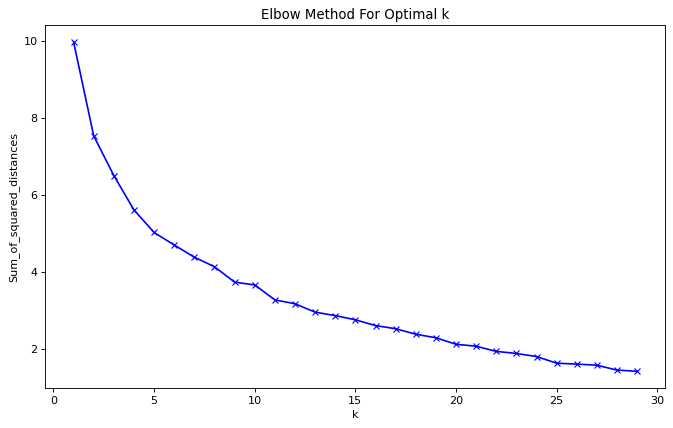

In [20]:
#Finding K
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(denver_cluster)
    Sum_of_squared_distances.append(km.inertia_)
figure(figsize = (10,6), dpi = 80)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [25]:
# set number of clusters
kclusters = 11

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(denver_cluster)

# check cluster labels generated for each row in the dataframe}
kmeans.labels_[0:10] 

array([10,  5,  3,  1,  6,  0,  4,  1,  1,  1])

In [26]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


ValueError: cannot insert Cluster Labels, already exists

In [27]:
neighborhoods_clustered = neighborhoods_venues_sorted
neighborhoods_clustered = neighborhoods_clustered.join(centroids.set_index('Neighborhood'), on ='Neighborhood')    
neighborhoods_clustered

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
Neighborhood,,,,,,,,,,,,,
Athmar Park,5,Shopping,Liquor & Dispenseries,Restaurants,Public Transit,Home Improvement,Fitness,Bed & Breakfast,Dessert,Banking & Professional Services,Groceries,39.703568,-105.010398
Auraria,1,"Arts, History, & Entertainment",Restaurants,Theaters & Music,Coffee & Tea,Fitness,Public Transit,Bars and Pubs,Boutique Restaurants,Brewerys & Distilleries,Sports Stadium,39.745821,-105.008267
Baker,5,Restaurants,Bars and Pubs,Liquor & Dispenseries,Shopping,Banking & Professional Services,Coffee & Tea,Home Improvement,Brewerys & Distilleries,Fitness,Boutique Restaurants,39.715221,-104.996212
Barnum,9,Restaurants,Liquor & Dispenseries,Fast Food,Boutique Restaurants,Public Transit,Banking & Professional Services,Dessert,Convenience Store,Shopping,Bars and Pubs,39.718390,-105.032386
Barnum West,4,Restaurants,Shopping,Convenience Store,Bed & Breakfast,Coffee & Tea,Public Transit,Liquor & Dispenseries,Banking & Professional Services,Home Improvement,Groceries,39.718542,-105.046463
Bear Valley,2,Fitness,Bed & Breakfast,Dessert,Public Transit,Liquor & Dispenseries,Banking & Professional Services,Home Improvement,Groceries,Shopping,Hobbys & Games,39.661134,-105.065547
Belcaro,8,Fast Food,Fitness,Bed & Breakfast,Dessert,Public Transit,Liquor & Dispenseries,Banking & Professional Services,Home Improvement,Groceries,Shopping,39.705044,-104.950477
Berkeley,7,Restaurants,Boutique Restaurants,Shopping,Coffee & Tea,Fitness,Brewerys & Distilleries,Bars and Pubs,"Arts, History, & Entertainment",Dessert,Selfcare & Health,39.776711,-105.039381
CBD,7,Restaurants,Hotel,Boutique Restaurants,Bars and Pubs,Theaters & Music,Coffee & Tea,Shopping,"Arts, History, & Entertainment",Dessert,Clubs,39.745123,-104.993161


Here we have a map displaying the 10 clusters

In [29]:

map_clusters = folium.Map(location=[39.73515, -104.97865], zoom_start=11.5, tiles = 'Stamen Toner')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

folium.GeoJson(gdf, name="geojson").add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_clustered['Latitude'], neighborhoods_clustered['Longitude'], neighborhoods_clustered.index, neighborhoods_clustered['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
clustered = neighborhoods_venues_sorted.reset_index()
clustered = clustered[['Cluster Labels','Neighborhood']]
clustered['Neighborhood'] = clustered.groupby(['Cluster Labels'])['Neighborhood'].transform(lambda x : ','.join(x))
clustered.drop_duplicates()


## Analysis <a name="analysis"></a>

With a glance at the created map we can see there are some specific clusters that have common traits, this will help our client as they assess neighborhoods.<br>
To demonstrate how a client might use this tool, we will explore it. Let's assume the client wants to live near Hobbys and Game Shops and Desserts.  They select those two from the checkboxes.

In [30]:
#Checkable boxes that will filter output Dataframe
import ipywidgets as widgets

data = categories

names = []
checkbox_objects = []
for key in data:
    checkbox_objects.append(widgets.Checkbox(value=False, description=key))
    names.append(key)

arg_dict = {names[i]: checkbox for i, checkbox in enumerate(checkbox_objects)}

ui = widgets.VBox(children=checkbox_objects)

selected_data = []
def select_data(**kwargs):
    selected_data.clear()

    for key in kwargs:
        if kwargs[key] is True:
            selected_data.append(key)

    print(selected_data)

out = widgets.interactive_output(select_data, arg_dict)
display(ui, out)

Output()

In [36]:
#function to get index locations that have client's chosen categories in top 3 positions

def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin(value)
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos
    print(listOfPos)

#Function to create a list of only unique positions






In [37]:
#function to get index locations that have client's chosen categories in top 3 positions

def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin(value)
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos
    print(listOfPos)

#Function to create a list of only unique positions






In [38]:
def unique(list1):
    unique_list = []
    for x in list1 :
        if x not in unique_list:
            unique_list.append(x)
    
    return unique_list
    print(unique_list)


This code will create a list of Neighborhoods with the chosen category or categories in their top 5 Most Common columns.

In [53]:
filtered = neighborhoods_venues_sorted
filtered = filtered.iloc[:,:6]
listOfPositions = getIndexes(filtered,selected_data)
listOfPositions = unique(listOfPositions) 
len(listOfPositions)


25

We have generated a lit of **24 neighborhoods that has both coffee shops and public transit** in it's top 3 categories of density. <br>
After reviewing the dataframe displayed they choose the University Hills Neighborhood and observe it is in Cluster 5 and they select the other cluster 5 neighborhoods, Baker, Northeast Park Hill, and Chaffee Park.
This dropdown takes that list and allows us to select as many or few Neighborhoods to view their data which is passed to the map. 

In [56]:
#model Jupyter dropdown
#initialized filtered_df to become a global that is update in the the dropdown selection
import ipywidgets as widgets
from ipywidgets import *
filtered_df = None

#Dropdown pulling from filtered dataframe of neighborhoods
dropdown = widgets.SelectMultiple(
                        options=listOfPositions,
                        description='Neighborhood',
                        disabled=False,
                        layout={'height':'100px', 'width':'20%'})

#function to filter dataframe based on dropdown selection and cast to global variable filtered_df
def filter_dataframe(widget):
    global filtered_df
    selection = list(widget['new'])

    with out:
        clear_output()
        display(neighborhoods_venues_sorted.loc[selection])        
        filtered_df = neighborhoods_venues_sorted.loc[selection]
    

        

out = widgets.Output()
dropdown.observe(filter_dataframe, names='value')
display(dropdown)
display(out)




SelectMultiple(description='Neighborhood', layout=Layout(height='100px', width='20%'), options=('Clayton', 'No…

Output()

We can quickly observe that each of these neighborhoods has a density of Shopping, Hobbys & Games, and Restaurants. Next we can view these neighborhoods on the map generated from the selections.

# Map that when run will highlight Neighborhhod in dropdown

In [57]:
#Reset index so that Neighborhood is a column
geometry = []
df=filtered_df.reset_index()
#loop to find index value of neighborhood
geometry.clear()
for i in gdf['Neighborhood'] :
    for x in list(dropdown.value):
        if i == x:
            geometry.append(int(gdf[gdf.Neighborhood == i].index.values))
    
   
       
m = Map(center = (39.73515, -104.97865), zoom = 12.2, basemap = basemaps.Stamen.Toner,
       layout = Layout(width = '100%', height = '720px'))




geo_data = GeoData(geo_dataframe = gdf)
neighborhood_data = GeoData(geo_dataframe = gdf.loc[geometry], 
                           style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Countries')



m.add_layer(geo_data)
m.add_layer(neighborhood_data)
m         
            
        

Map(center=[39.73515, -104.97865], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

## Results and Discussion <a name="results"></a>

Our exploration and analysis of the data shows that Denver has great variety within it's neighborhoods, we have been able to cluster the neighborhoods to find commonalities, such as that Hobby's & Games alongside Desserts are located outside of the city center. With further exploration we can quickly observe other interesting details such as the wide spread of fitness options again far outside the city center and that Cluster 7 Neighborhoods share fitness, restaurants, coffee and teas, as well as desserts in common.<br>
Perhaps most interesting of all is the density of Liquor and Dispenseries is in the outlying area of the city center with low density in the downtown areas. 


## Conclusion <a name="conclusion"></a>

The purpose of this project was to be able to recommend Neighborhoods for a client to investigate in the Denver area based on the types of venues they preferred to live near. Using the example of Coffee and Public Transit we were able to suggest four possible neighborhoods. <br>
These are the Neighborhoods of Cluster 5 which we discovered using the k means clustering done earlier in the project. University Hills, Baker, Northeast Park Hill, and Chaffee Park each have a high density of Coffee and Tea as well as easy access to Public Transit. <br>

The final decission on where to relocate to in Denver will be made by stakeholders based on further resource, cost of living, and other harder to determine factors such as commute and walkability.